### Kaggle Competition | Titanic Machine Learning from Disaster

>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew.  This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew.  Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this contest, we ask you to complete the analysis of what sorts of people were likely to survive.  In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

>This Kaggle Getting Started Competition provides an ideal starting place for people who may not have a lot of experience in data science and machine learning."

From the competition [homepage](http://www.kaggle.com/c/titanic-gettingStarted).


### Goal for this Notebook:
Show a simple example of an analysis of the Titanic disaster in Python using a full complement of PyData utilities. This is aimed for those looking to get into the field or those who are already in the field and looking to see an example of an analysis done with Python.

#### This Notebook will show basic examples of: 
#### Data Handling
*   Importing Data with Pandas
*   Cleaning Data
*   Exploring Data through Visualizations with Matplotlib

#### Data Analysis
*    Supervised Machine learning Techniques:
    +   Logit Regression Model 
    +   Plotting results
    +   Support Vector Machine (SVM) using 3 kernels
    +   Basic Random Forest
    +   Plotting results


***To run this notebook interactively, get it from my Github [here](https://github.com/agconti/kaggle-titanic). The competition's website is located on [Kaggle.com](http://www.kaggle.com/c/titanic-gettingStarted).***

In [1]:
!pip install matplotlib statsmodels sklearn pydot

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=6e4518acd40b6b75c4c60c722023077f159f6f74e30d5f06b0f98f6e1b5e9ac6
  Stored in directory: /home/jovyan/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built sklearn


In [71]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm


from sklearn import set_config
set_config(display='diagram') # to ensure we're able to view the diagrams in this Jupyter notebook environment

### Data Handling
#### Let's read our data in using pandas:

In [4]:
df = pd.read_csv("data/train.csv") 

Show an overview of our data: 

In [5]:
df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Let's take a look:

Above is a summary of our data contained in a `Pandas` `DataFrame`. Think of a `DataFrame` as a Python's super charged version of the workflow in an Excel table. As you can see the summary holds quite a bit of information. First, it lets us know we have 891 observations, or passengers, to analyze here:
    
    Int64Index: 891 entries, 0 to 890

Next it shows us all of the columns in `DataFrame`. Each column tells us something about each of our observations, like their `name`, `sex` or `age`. These colunms  are called a features of our dataset. You can think of the meaning of the words column and feature as interchangeable for this notebook. 

After each feature it lets us know how many values it contains. While most of our features have complete data on every observation, like the `survived` feature here: 

    survived    891  non-null values 

some are missing information, like the `age` feature: 

    age         714  non-null values 

These missing values are represented as `NaN`s.

### Take care of missing values:
The features `ticket` and `cabin` have many missing values and so can’t add much value to our analysis. To handle this we will drop them from the dataframe to preserve the integrity of our dataset.

To do that we'll use this line of code to drop the features entirely:

    df = df.drop(['ticket','cabin'], axis=1) 


While this line of code removes the `NaN` values from every remaining column / feature:
   
    df = df.dropna()
     
Now we have a clean and tidy dataset that is ready for analysis. Because `.dropna()` removes an observation from our data even if it only has 1 `NaN` in one of the features, it would have removed most of our dataset if we had not dropped the `ticket` and `cabin`  features first.



In [6]:
df = df.drop(['Ticket','Cabin'], axis=1)
# Remove NaN values
df = df.dropna() 

For a detailed look at how to use pandas for data analysis, the best resource is Wes Mckinney's [book](http://shop.oreilly.com/product/0636920023784.do). Additional interactive tutorials that cover all of the basics can be found [here](https://bitbucket.org/hrojas/learn-pandas) (they're free).  If you still need to be convinced about the power of pandas check out this wirlwhind [look](http://wesmckinney.com/blog/?p=647) at all that pandas can do. 

### Let's take a Look at our data graphically:

In [ ]:
# specifies the parameters of our graphs
fig = plt.figure(figsize=(18,6), dpi=1600) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# lets us plot many diffrent shaped graphs together 
ax1 = plt.subplot2grid((2,3),(0,0))
# plots a bar graph of those who surived vs those who did not.               
df.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
# this nicely sets the margins in matplotlib to deal with a recent bug 1.3.1
ax1.set_xlim(-1, 2)
# puts a title on our graph
plt.title("Distribution of Survival, (1 = Survived)")    

plt.subplot2grid((2,3),(0,1))
plt.scatter(df.Survived, df.Age, alpha=alpha_scatterplot)
# sets the y axis lable
plt.ylabel("Age")
# formats the grid line style of our graphs                          
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")

ax3 = plt.subplot2grid((2,3),(0,2))
df.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(df.Pclass.value_counts()))
plt.title("Class Distribution")

plt.subplot2grid((2,3),(1,0), colspan=2)
# plots a kernel density estimate of the subset of the 1st class passangers's age
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
 # plots an axis lable
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
# sets our legend for our graph.
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 

ax5 = plt.subplot2grid((2,3),(1,2))
df.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(df.Embarked.value_counts()))
# specifies the parameters of our graphs
plt.title("Passengers per boarding location")

Text(0.5, 1.0, 'Passengers per boarding location')

### Exploratory Visualization:

The point of this competition is to predict if an individual will survive based on the features in the data like:
 
 * Traveling Class (called pclass in the data)
 * Sex 
 * Age
 * Fare Price

Let’s see if we can gain a better understanding of who survived and died. 


First let’s plot a bar graph of those who Survived Vs. Those who did not.


Text(0.5, 1.0, 'Survival Breakdown (1 = Survived, 0 = Died)')

<Figure size 432x288 with 0 Axes>

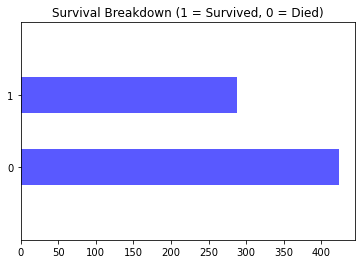

In [7]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
df.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(df.Survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

### Now lets use our model to predict the test set values and then save the results so they can be outputed to Kaggle
### Read the test data

In [8]:
test_data = pd.read_csv("data/test.csv")

### Examine our dataframe

In [9]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [10]:
# Create an acceptable formula for our machine learning algorithms
formula_ml = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked) - 1'

### Random Forest

"Well, What if this line / decision boundary thing doesn’t work at all."

**Wikipedia, crystal clear as always:**
>Random forests are an ensemble learning method for classification (and regression) that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes output by individual trees.

**Once again, the skinny and why it matters to you:**

There are always skeptics, and you just might be one about all the fancy lines we've created so far. Well for you, here’s another option; the Random Forest. This technique is a form of non-parametric modeling that does away with all those equations we created above, and uses raw computing power and a clever statistical observation to tease the structure out of the data. 

An anecdote to explain how this the forest works starts with the lowly gumball jar. We've all guess how many gumballs are in that jar at one time or another, and odds are not a single one of us guessed exactly right. Interestingly though, while each of our individual guesses for probably were wrong, the average of all of the guesses, if there were enough, usually comes out to be pretty close to the actual number of gumballs in the jar. Crazy, I know.  This idea is that clever statistical observation that lets random forests work.

**How do they work?** A random forest algorithm randomly generates many extremely simple models to explain the variance observed in random subsections of our data.  These models are like our gumball guesses. They are all awful individually. Really awful. But once they are averaged, they can be powerful predictive tools. The averaging step is the secret sauce. While the vast majority of those models were extremely poor; they were all as bad as each other on average. So when their predictions are averaged together, the bad ones average their effect on our model out to zero. The thing that remains, *if anything*, is one or a handful of those models have stumbled upon the true structure of the data.
The cell below shows the process of instantiating and fitting a random forest, generating predictions form the resulting model, and then scoring the results.

In [11]:
# import the machine learning library that holds the randomforest
import sklearn.ensemble as ske

# Create the random forest model and fit the model to our training data
y, x = dmatrices(formula_ml, data=df, return_type='dataframe')
# RandomForestClassifier expects a 1 demensional NumPy array, so we convert
y = np.asarray(y).ravel()
#instantiate and fit our model
results_rf = ske.RandomForestClassifier(n_estimators=100).fit(x, y)

# Score the results
score = results_rf.score(x, y)
print("Mean accuracy of Random Forest Predictions on the data was: {0}".format(score))

Mean accuracy of Random Forest Predictions on the data was: 0.9452247191011236


In [12]:
x

,C(Pclass)[1],C(Pclass)[2],C(Pclass)[3],C(Sex)[T.male],C(Embarked)[T.Q],C(Embarked)[T.S],Age,SibSp,Parch
0,0.0,0.0,1.0,1.0,0.0,1.0,22.0,1.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,38.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,26.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,1.0,35.0,1.0,0.0
4,0.0,0.0,1.0,1.0,0.0,1.0,35.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
885,0.0,0.0,1.0,0.0,1.0,0.0,39.0,0.0,5.0
886,0.0,1.0,0.0,1.0,0.0,1.0,27.0,0.0,0.0
887,1.0,0.0,0.0,0.0,0.0,1.0,19.0,0.0,0.0
889,1.0,0.0,0.0,1.0,0.0,0.0,26.0,0.0,0.0


In [13]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

In [14]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot

# Pull out one tree from the forest
tree = results_rf.estimators_[5]

# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = x.columns, rounded = True, precision = 1)

# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('tree.dot')

# Write graph to a png file
graph.write_png('tree.png')

![](tree.png)

In [18]:
# Limit depth of tree to 3 levels
rf_small = ske.RandomForestClassifier(n_estimators=10, max_depth = 3).fit(x, y)

# Extract the small tree
tree_small = rf_small.estimators_[5]
# Save the tree as a png image
export_graphviz(tree_small, out_file = 'small_tree.dot', feature_names = x.columns, rounded = True, precision = 1)
(graph, ) = pydot.graph_from_dot_file('small_tree.dot')
graph.write_png('small_tree.png');

In [49]:
!pwd

/home/jovyan/workshop


![](small_tree.png)

In [19]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,29.1250,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.0000,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.0000,C


In [20]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
%%writefile titanic_flow.py

from metaflow import FlowSpec, step, Parameter
from collections import defaultdict
from functools import reduce

import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.nonparametric.kde import KDEUnivariate
from statsmodels.nonparametric import smoothers_lowess
from pandas import Series, DataFrame
from patsy import dmatrices
from sklearn import datasets, svm
from sklearn.ensemble import RandomForestClassifier


class TitanicFlow(FlowSpec):
    max_depth = Parameter("max_depth", default=10)
    n_estimators=Parameter("n_estimators", default=50)
    parallelism = Parameter("parallelism", default=2)
    
    
    @step
    def start(self):
        # Create an acceptable formula for our machine learning algorithms
        self.formula_ml = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked) - 1'
        self.next(self.feature_engineer)

    @step
    def feature_engineer(self):
        df = pd.read_csv("data/train.csv") 
        df = df.drop(['Ticket','Cabin'], axis=1)
        # Remove NaN values
        df = df.dropna() 
        
        # Create the random forest model and fit the model to our training data
        y, x = dmatrices(self.formula_ml, data=df, return_type='dataframe')
        # RandomForestClassifier expects a 1 demensional NumPy array, so we convert
        y = np.asarray(y).ravel()
        
        self.x = x
        self.y = y
        
        batch = self.n_estimators / self.parallelism
        self.tree_batches = [int(batch) for x in range(int(self.n_estimators / batch))]
        print(f"self.tree_batches = {self.tree_batches}")
        self.next(self.model_train, foreach="tree_batches")
        
    
    @step
    def model_train(self):
        #instantiate and fit our model
        self.random_forest = RandomForestClassifier(n_estimators=self.input, max_depth=self.max_depth).fit(self.x, self.y)
        self.next(self.model_score)
        
    @step
    def model_score(self):        
        self.score = self.random_forest.score(self.x, self.y)
        print(f"Mean accuracy of Random Forest Predictions on the data was: {self.score}")
        self.next(self.combine_score)
        
    @step
    def combine_score(self, inputs):        
        # Score the results
        def combine_rfs(input_a, input_b):
            input_a.random_forest.estimators_ += input_b.random_forest.estimators_
            input_a.random_forest.n_estimators = len(input_a.random_forest.estimators_)
            return input_a.random_forest
        print("----inputs", list(inputs))
        self.random_forest_combined = reduce(combine_rfs, inputs)
        
        self.merge_artifacts(inputs, include=['x', 'y'])
        self.combined_score = self.random_forest_combined.score(self.x, self.y)
        print(f"Mean accuracy of Combined Random Forest Predictions on the data was: {self.combined_score}")
        self.next(self.end)       

    @step
    def end(self):
        pass
        

if __name__ == '__main__':
    TitanicFlow()

Overwriting titanic_flow.py


In [ ]:
!python titanic_flow.py run

In [29]:
from metaflow import Task, Step, Flow

In [ ]:
Step(f"{Flow('TitanicFlow').latest_run.pathspec}/combine_score").task.data.combined_score

In [46]:
run_pathspec = Flow("TitanicFlow").latest_run.pathspec

In [47]:
Step(f"{run_pathspec}/model_score").task.data.random_forest.n_estimators

25

In [48]:
Step(f"{run_pathspec}/combine_score").task.data.random_forest_combined.n_estimators

50